In [2]:
pip install yfinance


In [3]:
pip install pandas numpy matplotlib seaborn


In [4]:
import yfinance as yf
import pandas as pd


stocks = ['AAPL', 'TSLA']
data = yf.download(stocks, start='2018-01-01', end='2023-12-31')

data.head()


/tmp/ipython-input-2543963917.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stocks, start='2018-01-01', end='2023-12-31')
[*********************100%***********************]  2 of 2 completed


Price           Close                  High                   Low             \
Ticker           AAPL       TSLA       AAPL       TSLA       AAPL       TSLA   
Date                                                                           
2018-01-02  40.380997  21.368668  40.390375  21.474001  39.677740  20.733334   
2018-01-03  40.373962  21.150000  40.917816  21.683332  40.310672  21.036667   
2018-01-04  40.561508  20.974667  40.664653  21.236668  40.338811  20.378668   
2018-01-05  41.023312  21.105333  41.110045  21.149332  40.566195  20.799999   
2018-01-08  40.870941  22.427334  41.166308  22.468000  40.772482  21.033333   

Price            Open                Volume             
Ticker           AAPL       TSLA       AAPL       TSLA  
Date                                                    
2018-01-02  39.888719  20.799999  102223600   65283000  
2018-01-03  40.444289  21.400000  118071600   67822500  
2018-01-04  40.446642  20.858000   89738400  149194500  
2018-01-05  40.657619  21.108000   94640000   68868000  
2018-01-08  40.870941  21.066668   82271200  147891000

In [5]:
data.isnull().sum()

Price   Ticker
Close   AAPL      0
        TSLA      0
High    AAPL      0
        TSLA      0
Low     AAPL      0
        TSLA      0
Open    AAPL      0
        TSLA      0
Volume  AAPL      0
        TSLA      0
dtype: int64

In [6]:

data.columns = ['_'.join(col).strip() for col in data.columns.values]
data.head()


,Close_AAPL,Close_TSLA,High_AAPL,High_TSLA,Low_AAPL,Low_TSLA,Open_AAPL,Open_TSLA,Volume_AAPL,Volume_TSLA
Date,,,,,,,,,,
2018-01-02,40.380997,21.368668,40.390375,21.474001,39.677740,20.733334,39.888719,20.799999,102223600,65283000
2018-01-03,40.373962,21.150000,40.917816,21.683332,40.310672,21.036667,40.444289,21.400000,118071600,67822500
2018-01-04,40.561508,20.974667,40.664653,21.236668,40.338811,20.378668,40.446642,20.858000,89738400,149194500
2018-01-05,41.023312,21.105333,41.110045,21.149332,40.566195,20.799999,40.657619,21.108000,94640000,68868000
2018-01-08,40.870941,22.427334,41.166308,22.468000,40.772482,21.033333,40.870941,21.066668,82271200,147891000


In [7]:
data.describe()

,Close_AAPL,Close_TSLA,High_AAPL,High_TSLA,Low_AAPL,Low_TSLA,Open_AAPL,Open_TSLA,Volume_AAPL,Volume_TSLA
count,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1.509000e+03,1.509000e+03
mean,107.928931,145.981504,109.057665,149.313587,106.687573,142.479038,107.828879,146.023254,1.073284e+08,1.332479e+08
std,50.983470,113.530192,51.457732,116.141645,50.455420,110.885498,50.942456,113.661210,5.513287e+07,8.365608e+07
min,33.832436,11.931333,34.672357,12.445333,33.787227,11.799333,34.258343,12.073333,2.404830e+07,2.940180e+07
25%,51.287098,22.271334,52.090885,22.660000,50.907721,21.833332,51.424618,22.250000,7.078370e+07,8.112930e+07
50%,120.581505,160.190002,121.836796,161.619995,119.080924,153.279999,120.722430,159.663330,9.296430e+07,1.090935e+08
75%,150.366409,242.190002,152.119813,246.990005,148.366937,236.976669,150.191839,241.770004,1.280440e+08,1.550325e+08
max,196.446808,409.970001,197.944126,414.496674,195.346140,405.666656,196.357567,411.470001,4.265100e+08,9.140820e+08


In [8]:
import numpy as np
data.isin([np.inf, -np.inf]).sum()

,0
Close_AAPL,0
Close_TSLA,0
High_AAPL,0
High_TSLA,0
Low_AAPL,0
Low_TSLA,0
Open_AAPL,0
Open_TSLA,0
Volume_AAPL,0
Volume_TSLA,0


In [9]:

data['Daily_Change_AAPL'] = data['Close_AAPL'].pct_change() * 100
data['Daily_Change_TSLA'] = data['Close_TSLA'].pct_change() * 100

data['MA20_AAPL'] = data['Close_AAPL'].rolling(window=20).mean()
data['MA50_AAPL'] = data['Close_AAPL'].rolling(window=50).mean()
data['MA20_TSLA'] = data['Close_TSLA'].rolling(window=20).mean()
data['MA50_TSLA'] = data['Close_TSLA'].rolling(window=50).mean()




In [10]:
print(data[['Close_AAPL', 'Daily_Change_AAPL']].head(10))
print(data[['Close_TSLA', 'Daily_Change_TSLA']].head(10))


            Close_AAPL  Daily_Change_AAPL
Date                                     
2018-01-02   40.380997                NaN
2018-01-03   40.373962          -0.017420
2018-01-04   40.561508           0.464522
2018-01-05   41.023312           1.138526
2018-01-08   40.870941          -0.371424
2018-01-09   40.866238          -0.011508
2018-01-10   40.856869          -0.022926
2018-01-11   41.088947           0.568028
2018-01-12   41.513233           1.032603
2018-01-16   41.302258          -0.508213
            Close_TSLA  Daily_Change_TSLA
Date                                     
2018-01-02   21.368668                NaN
2018-01-03   21.150000          -1.023311
2018-01-04   20.974667          -0.828998
2018-01-05   21.105333           0.622974
2018-01-08   22.427334           6.263822
2018-01-09   22.246000          -0.808538
2018-01-10   22.320000           0.332641
2018-01-11   22.530001           0.940865
2018-01-12   22.414667          -0.511911
2018-01-16   22.670668           1

In [11]:
print(data[['Close_AAPL','MA20_AAPL','MA50_AAPL']].tail(30))
print(data[['Close_TSLA','MA20_TSLA','MA50_TSLA']].tail(30))


            Close_AAPL   MA20_AAPL   MA50_AAPL
Date                                          
2023-11-16  188.117325  176.210211  174.991244
2023-11-17  188.097519  177.054933  175.224161
2023-11-20  189.842728  177.980974  175.468611
2023-11-21  189.039520  178.845068  175.757603
2023-11-22  189.703903  179.858247  176.101278
2023-11-24  188.375168  181.013447  176.388074
2023-11-27  188.196655  182.093866  176.685760
2023-11-28  188.801529  183.102032  176.936916
2023-11-29  187.780197  184.035365  177.145859
2023-11-30  188.355331  184.839006  177.437210
2023-12-01  189.634506  185.528352  177.785043
2023-12-04  187.839661  186.173510  178.079945
2023-12-05  191.796173  186.888745  178.428428
2023-12-06  190.705444  187.421199  178.836697
2023-12-07  192.639038  187.997353  179.313941
2023-12-08  194.066971  188.668669  179.814594
2023-12-11  191.558197  189.004823  180.254772
2023-12-12  193.075348  189.496162  180.674986
2023-12-13  196.298080  190.017746  181.186393
2023-12-14  1

In [12]:
print(data[['Close_AAPL','Daily_Change_AAPL','MA20_AAPL','MA50_AAPL',
            'Close_TSLA','Daily_Change_TSLA','MA20_TSLA','MA50_TSLA']].tail(15))


            Close_AAPL  Daily_Change_AAPL   MA20_AAPL   MA50_AAPL  Close_TSLA  \
Date                                                                            
2023-12-08  194.066971           0.741248  188.668669  179.814594  243.839996   
2023-12-11  191.558197          -1.292736  189.004823  180.254772  239.740005   
2023-12-12  193.075348           0.792005  189.496162  180.674986  237.009995   
2023-12-13  196.298080           1.669158  190.017746  181.186393  239.289993   
2023-12-14  196.446808           0.075766  190.518505  181.675819  251.050003   
2023-12-15  195.911362          -0.272565  190.908207  182.129778  253.500000   
2023-12-18  194.245468          -0.850330  191.215604  182.499321  252.080002   
2023-12-19  195.286652           0.536014  191.487801  182.859977  257.220001   
2023-12-20  193.194366          -1.071392  191.695543  183.190672  247.139999   
2023-12-21  193.045624          -0.076991  191.862629  183.490465  254.500000   
2023-12-22  191.974701      

In [13]:

monthly_close = data[['Close_AAPL','Close_TSLA']].resample('ME').last()
print(monthly_close.head())

annual_close = data[['Close_AAPL','Close_TSLA']].resample('YE').last()
print(annual_close.head())

            Close_AAPL  Close_TSLA
Date                              
2018-01-31   39.248749   23.620667
2018-02-28   41.924927   22.870667
2018-03-31   39.491161   17.742001
2018-04-30   38.898014   19.593332
2018-05-31   44.154068   18.982000
            Close_AAPL  Close_TSLA
Date                              
2018-12-31   37.532391   22.186666
2019-12-31   70.920372   27.888666
2020-12-31  129.292572  235.223328
2021-12-31  174.090164  352.260010
2022-12-31  128.123062  123.180000


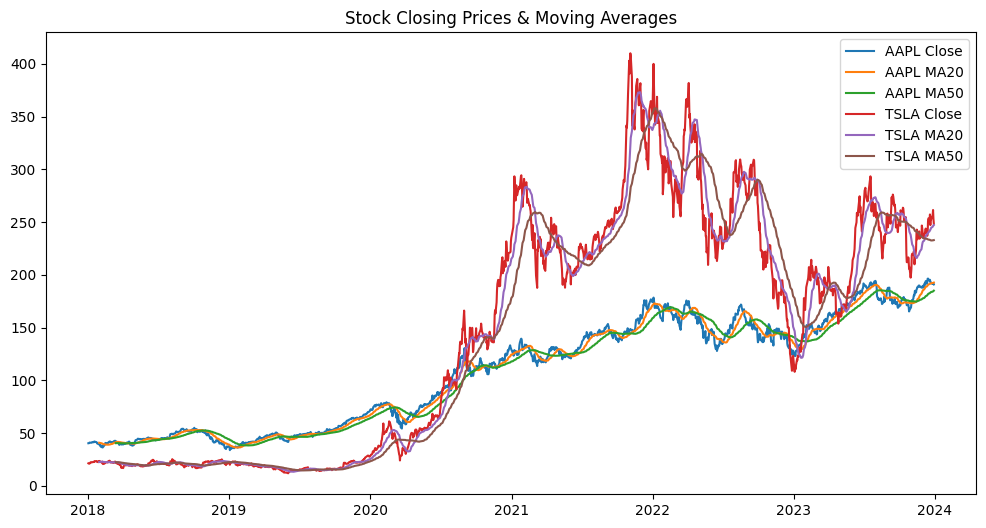

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(data['Close_AAPL'], label='AAPL Close')
plt.plot(data['MA20_AAPL'], label='AAPL MA20')
plt.plot(data['MA50_AAPL'], label='AAPL MA50')
plt.plot(data['Close_TSLA'], label='TSLA Close')
plt.plot(data['MA20_TSLA'], label='TSLA MA20')
plt.plot(data['MA50_TSLA'], label='TSLA MA50')
plt.title('Stock Closing Prices & Moving Averages')
plt.legend()
plt.show()


Correlation Analysis

In [15]:
correlation = data['Close_AAPL'].corr(data['Close_TSLA'])
print("Correlation between Apple and Tesla:", correlation)


Correlation between Apple and Tesla: 0.9226202334137803


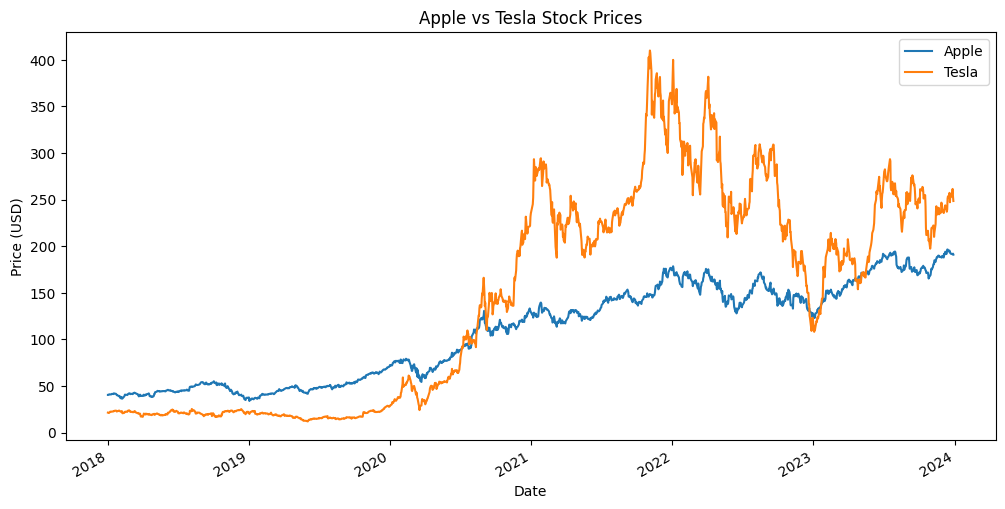

In [16]:
data[['Close_AAPL', 'Close_TSLA']].plot(figsize=(12,6))
plt.title('Apple vs Tesla Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(['Apple', 'Tesla'])
plt.show()


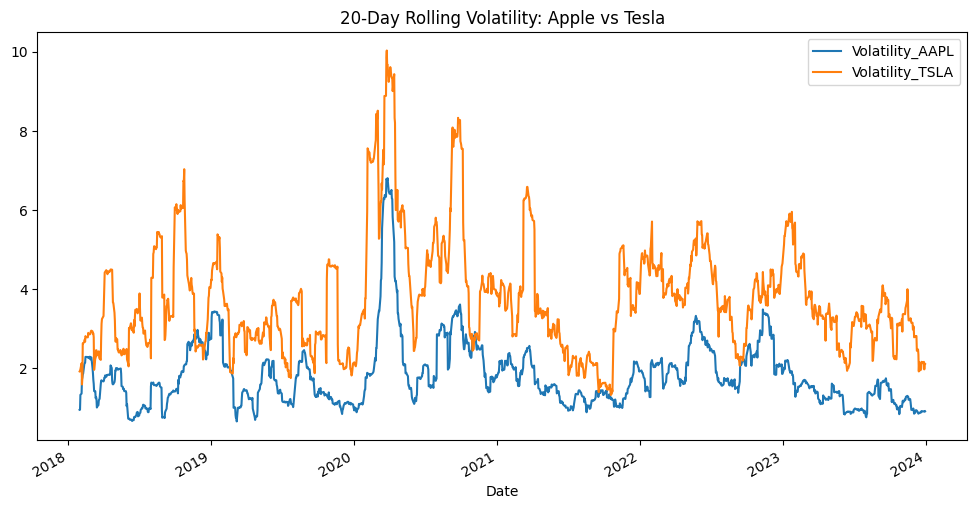

In [17]:
data['Volatility_AAPL'] = data['Daily_Change_AAPL'].rolling(window=20).std()
data['Volatility_TSLA'] = data['Daily_Change_TSLA'].rolling(window=20).std()

data[['Volatility_AAPL', 'Volatility_TSLA']].plot(figsize=(12,6))
plt.title('20-Day Rolling Volatility: Apple vs Tesla')
plt.show()


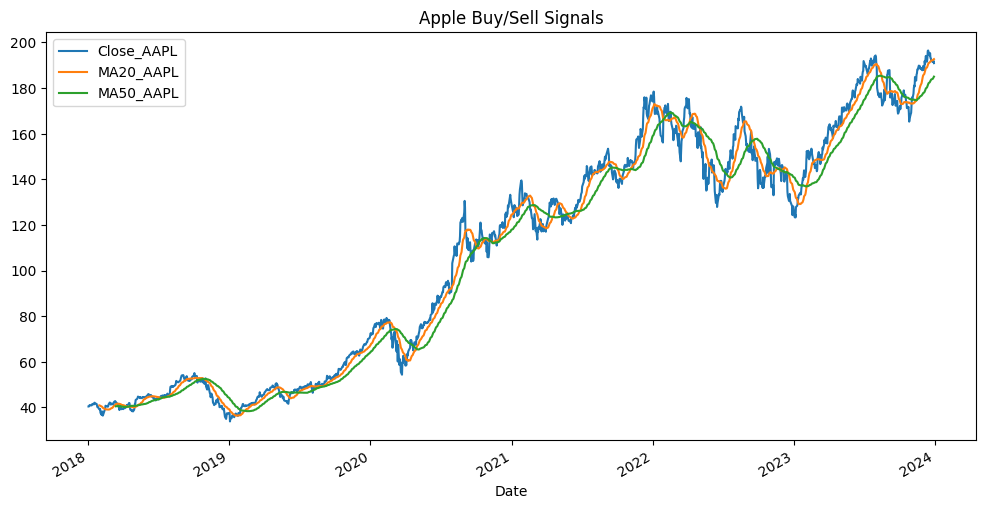

In [18]:
data['Signal_AAPL'] = 0
data.loc[data['MA20_AAPL'] > data['MA50_AAPL'], 'Signal_AAPL'] = 1
data.loc[data['MA20_AAPL'] < data['MA50_AAPL'], 'Signal_AAPL'] = -1

data[['Close_AAPL', 'MA20_AAPL', 'MA50_AAPL']].plot(figsize=(12,6))
plt.title('Apple Buy/Sell Signals')
plt.show()


Moving Average Crossover Strategy

/tmp/ipython-input-2542680797.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2022-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


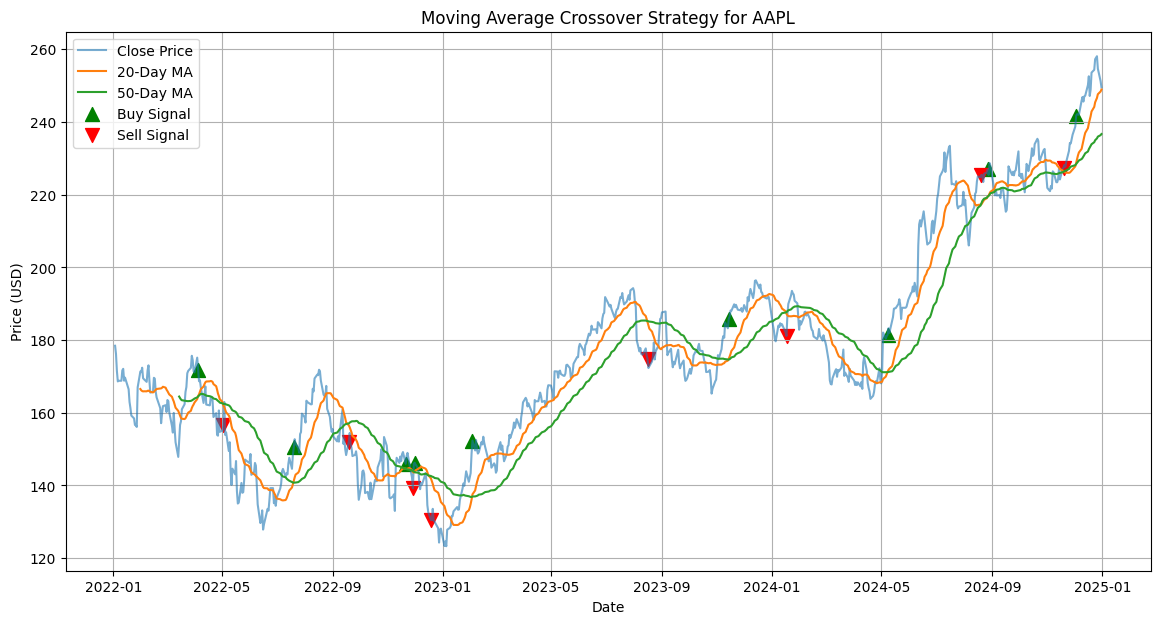

Buy Signals:
 Price            Close
Ticker            AAPL
Date                  
2022-04-05  171.847992
2022-07-20  150.452744
2022-11-21  145.951599
2022-12-01  146.247437
2023-02-03  152.351334

Sell Signals:
 Price            Close
Ticker            AAPL
Date                  
2022-05-03  156.553879
2022-09-19  152.079376
2022-11-29  139.206741
2022-12-19  130.529129
2023-08-16  174.857300


In [19]:


import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


df = yf.download('AAPL', start='2022-01-01', end='2025-01-01')


df['Short_MA'] = df['Close'].rolling(window=20).mean()
df['Long_MA'] = df['Close'].rolling(window=50).mean()

df['Signal'] = 0
df.loc[df['Short_MA'] > df['Long_MA'], 'Signal'] = 1
df.loc[df['Short_MA'] < df['Long_MA'], 'Signal'] = -1


df['Crossover'] = df['Signal'].diff()


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price', alpha=0.6)
plt.plot(df.index, df['Short_MA'], label='20-Day MA', linewidth=1.5)
plt.plot(df.index, df['Long_MA'], label='50-Day MA', linewidth=1.5)


plt.scatter(df[df['Crossover'] == 2].index,
            df[df['Crossover'] == 2]['Close'],
            label='Buy Signal', marker='^', color='green', s=100)


plt.scatter(df[df['Crossover'] == -2].index,
            df[df['Crossover'] == -2]['Close'],
            label='Sell Signal', marker='v', color='red', s=100)

plt.title('Moving Average Crossover Strategy for AAPL')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


buy_signals = df[df['Crossover'] == 2][['Close']]
sell_signals = df[df['Crossover'] == -2][['Close']]

print("Buy Signals:\n", buy_signals.head())
print("\nSell Signals:\n", sell_signals.head())


Linear Regression Model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = df[['Close', 'Short_MA', 'Long_MA']].dropna()

data['Next_Close'] = data['Close'].shift(-1)

data = data[:-1]

X = data[['Close', 'Short_MA', 'Long_MA']]
y = data['Next_Close']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [21]:

model = LinearRegression()


model.fit(X_train, y_train)


LinearRegression()

In [22]:

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.4f}")


Mean Squared Error: 10.65
R^2 Score: 0.9180


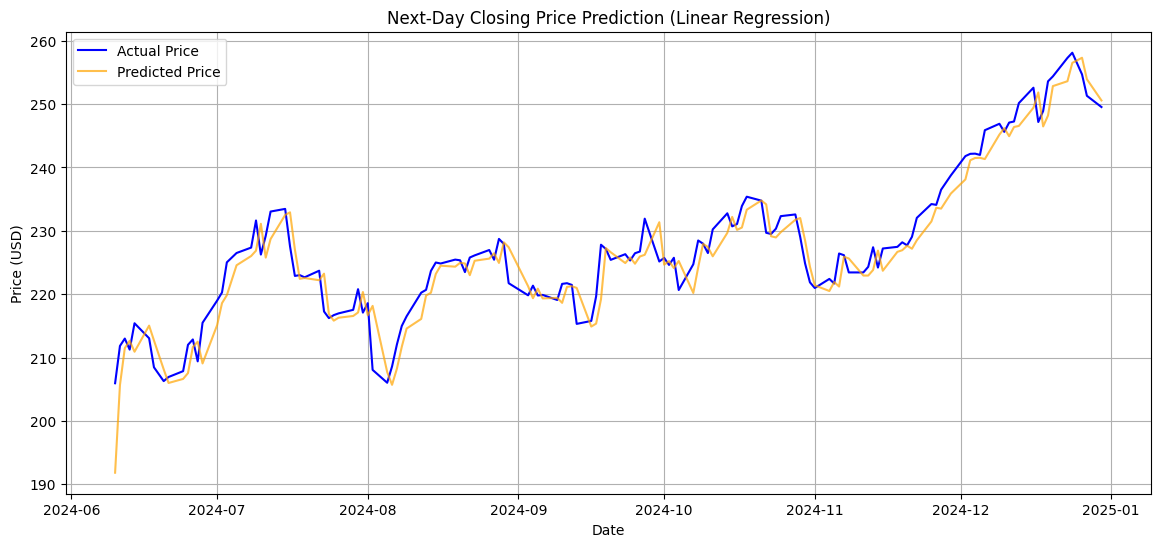

In [23]:
plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Price', color='orange', alpha=0.7)
plt.title('Next-Day Closing Price Prediction (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()
